In [1]:
from fastai.vision.all import *

In [2]:
from fastbook import *
urls = search_images_ddg('grizzly bear', max_images=100)
len(urls),urls[0]

C:\Users\zubik\anaconda3\lib\site-packages\fastbook\__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


(100,
 'https://blog.humanesociety.org/wp-content/uploads/2019/04/BEAR_GRIZZLY_A45T3555_468435.jpg')

In [3]:
urls

(#100) ['https://blog.humanesociety.org/wp-content/uploads/2019/04/BEAR_GRIZZLY_A45T3555_468435.jpg','https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-1240x823.jpg','http://earthdev.earthrangers.com/public/content/wildwire/GrizzlyBear.jpg','https://www.insideedition.com/sites/default/files/images/2018-04/cred_grouse_mountain_7.jpg','https://www.canadatravelspecialists.com/media/3362/bear-catching-salmon.jpeg','https://taylormoney.com/wp-content/uploads/2020/05/grizzly-bear-1564257594hjC.jpg','https://www.conservationnw.org/wp-content/uploads/2017/10/grizzly-bears-1280x950.jpg','https://4.bp.blogspot.com/-HNxOANqzIwQ/Un_rDbUxCGI/AAAAAAAABUc/CpX9FRsAdLA/s1600/Grizzly_Bear_2.jpg','https://reidparkzoo.org/wp-content/uploads/2013/09/grzbear2812a.jpg','https://townsquare.media/site/124/files/2019/03/gettyimages-1061398490-594x594.jpg?w=1200&h=0&zc=1&s=0&a=t&q=89'...]

In [4]:
path = Path('dogs_img')

In [5]:
dog_breeds = ['labrador', 'golden retriever', 'doberman']

In [6]:
if not path.exists():
    path.mkdir()
    for dog in dog_breeds:
        dest = (path/dog)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{dog} dog',max_images=100)
        download_images(dest, urls=results)

In [7]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#0) []

In [8]:
failed.map(Path.unlink);

In [32]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #tipo de input, tipo de output
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label  # uses the name of parent folder as label
    )

In [33]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3),
               batch_tfms=aug_transforms())

In [34]:
dls = dogs.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


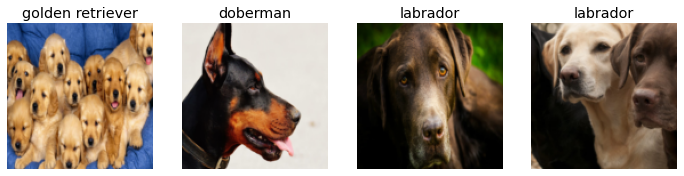

In [37]:
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [40]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.112959,0.042408,0.017241,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.108691,0.055452,0.034483,00:17
1,0.082163,0.068476,0.017241,00:17
2,0.077901,0.023732,0.017241,00:17
3,0.098822,0.012737,0.000000,00:17
4,0.103574,0.007744,0.000000,00:17
5,0.106759,0.006020,0.000000,00:17


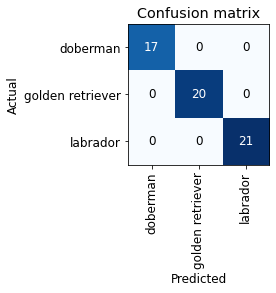

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

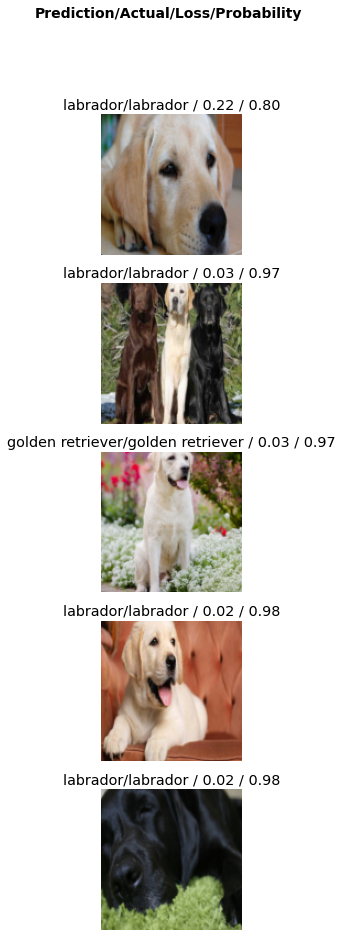

In [42]:
interp.plot_top_losses(5, nrows=5)  #prediced, answer, score predicted, score for answer

In [22]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn, max_n=30)
cleaner

In [18]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [20]:
img = PILImage.create(btn_upload.data[-1])

In [21]:
learn.predict(img)

('labrador', TensorBase(2), TensorBase([8.3469e-06, 6.6214e-05, 9.9993e-01]))

In [46]:
learn.export()

In [45]:
path2 = Path()

In [47]:
path2.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
path

Path('dogs_img')

In [31]:
learn_inf = load_learner(path2/'export.pkl')